In [1]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

import genexpr
from genexpr.twostagemodel import TwoStageModel

# Part 1: Simulation of paper results

- $a = \nu_0 / d_1$
- $b = \nu_1 / d_0$
- $\gamma = d_0 / d_1$
- $\tau = d_1 t$

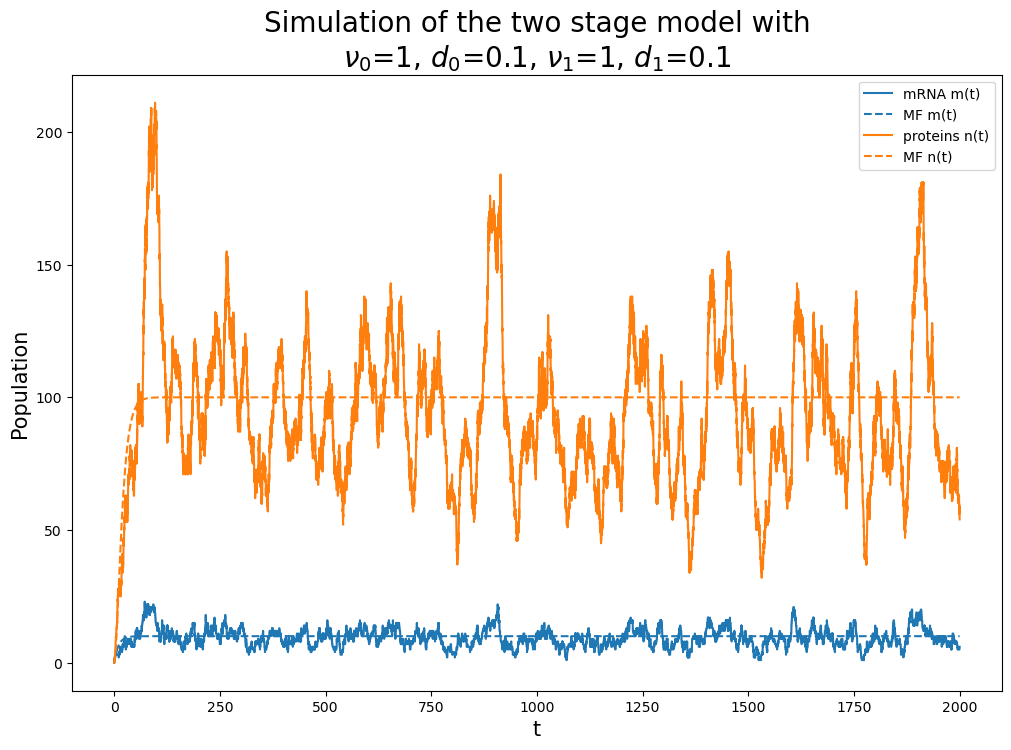

In [2]:
# initializations
twostage = TwoStageModel()
t = 0.0
x = np.array([0,0])

nu0, d0, nu1, d1 = 1, 0.1, 1, 0.1
args = [nu0, d0, nu1, d1]


# Gillespie iterations
tmax=2.0e3
(m_t, n_t), t_t = twostage.Gillespie_simulation(x, t, tmax, args, keep_track=True)


# Mean field solution
t0 = np.linspace(0, tmax, num=1000)
m_MF_t, n_MF_t = twostage.mean_field_prediction(np.array([0,0]), t0, args)


# plots
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(t_t, m_t, label="mRNA m(t)")
ax.plot(t0, m_MF_t, "--", color="C0", label="MF m(t)")
ax.plot(t_t, n_t, label="proteins n(t)")
ax.plot(t0, n_MF_t, "--", color="C1", label="MF n(t)")

ax.set_title("Simulation of the two stage model with\n" + fr"$\nu_0$={nu0}, $d_0$={d0}, $\nu_1$={nu1}, $d_1$={d1}", fontsize=20)
ax.set_xlabel("t", fontsize=15)
ax.set_ylabel("Population", fontsize=15)
ax.legend()

### Figure 1B


In [3]:
# gamma = 1
gamma, a, b, d1 = 1.0, 20.0, 2.5, 5e-4
args = (a*d1, gamma*d1, b*gamma*d1, d1)
tmax = 10.0/d1

n_hist = []
for k in range(1000):
    (mf, nf), _ = twostage.Gillespie_simulation(x0=np.array([0,0]), t0=0.0, tmax=tmax, args=args, keep_track=False)
    n_hist.append(nf)

Text(0.5, 1.0, 'Simulation of the two stage model with\n$a$=20.0, $b$=2.5, $d_1$=0.0005')

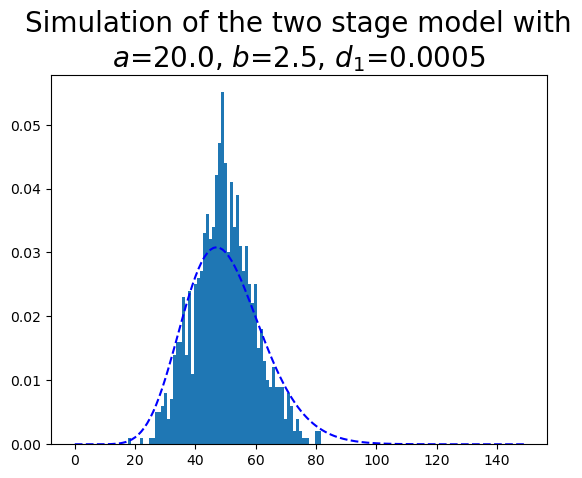

In [7]:
_ = plt.hist(n_hist, bins=np.arange(start=-0.5, stop=max(n_hist)+0.5, step=1), density=True)
plt.plot(np.arange(150), twostage.analytical_transient(np.arange(150), tmax, args, normalize=True), "b--")
plt.title("Simulation of the two stage model with\n" + fr"$a$={a}, $b$={b}, $d_1$={d1}", fontsize=20)

# Part 2: simulation with real data

In [11]:
data = pd.read_csv("data/data_LN_PST_MB.csv")
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,9537,9538,9539,9540,9541,9542,9543,9544,9545,9546
0,Klf4,1.237182,1.233101,1.243267,1.243267,1.258404,1.267722,1.283406,1.280832,1.280832,...,0.219237,0.219237,0.219237,0.219237,0.219237,0.219237,0.219237,0.219237,0.228717,0.228717
1,Klf2,1.143295,1.152089,1.142363,1.142363,1.148623,1.156669,1.146918,1.144345,1.160804,...,0.603555,0.594118,0.579160,0.579160,0.567149,0.567149,0.561093,0.561093,0.547104,0.538954
2,Esrrb,0.279826,0.288620,0.294988,0.287320,0.273908,0.284033,0.296715,0.296715,0.296715,...,0.227777,0.227777,0.227777,0.227777,0.227777,0.235784,0.235784,0.244157,0.250020,0.250020
3,Tfcp2l1,0.401544,0.398395,0.404763,0.404763,0.395887,0.395887,0.395887,0.377906,0.386765,...,0.180767,0.180767,0.180767,0.180767,0.180767,0.188773,0.188773,0.188773,0.188773,0.180624
4,Tbx3,0.403655,0.403655,0.410023,0.418348,0.418348,0.418348,0.418348,0.418348,0.427207,...,0.048126,0.048126,0.048126,0.048126,0.048126,0.048126,0.048126,0.048126,0.048126,0.054489
5,Stat3,0.202862,0.202862,0.202862,0.211187,0.211187,0.217524,0.217524,0.217524,0.217524,...,0.079573,0.079573,0.079573,0.079573,0.074924,0.074924,0.074924,0.074924,0.074924,0.081287
6,Nanog,1.495087,1.499515,1.500030,1.512749,1.514474,1.517210,1.499557,1.496983,1.513442,...,0.711486,0.711486,0.703707,0.704079,0.713666,0.728945,0.730405,0.723751,0.720273,0.707776
7,Sox2,1.120685,1.139374,1.131371,1.132028,1.142310,1.127394,1.117644,1.129211,1.131348,...,1.617569,1.632745,1.625340,1.625820,1.628100,1.608371,1.610549,1.605609,1.604353,1.611192
8,Nr0b1,0.192992,0.192992,0.184989,0.184989,0.184989,0.184989,0.184989,0.184989,0.184989,...,0.195403,0.195403,0.195403,0.195403,0.195403,0.195403,0.189348,0.189348,0.189348,0.189348
9,Zic3,0.203369,0.203369,0.203369,0.211694,0.211694,0.211694,0.219989,0.219989,0.219989,...,0.847688,0.838251,0.842202,0.842574,0.828984,0.841298,0.831556,0.824903,0.824903,0.823116
